# <font color="blue"> DNP 1: Solid Effect </font>

In [1]:
import sys
sys.path.append('/Users/albertsmith/Documents/GitHub/')
sys.path.append('/Users/albertsmith/Documents/GitHub.nosync/')
import SLEEPY as sl
import numpy as np
import matplotlib.pyplot as plt
sl.Defaults['cache']=False

In [30]:
ex=sl.ExpSys(v0H=600,Nucs=['e-','1H'],LF=[False,True],vr=0,T_K=80,pwdavg=sl.PowderAvg(q=2)[5])
ex.set_inter('hyperfine',i0=0,i1=1,Axx=-1000000,Ayy=-1000000,Azz=2000000)
# ex.set_inter('dipole',i0=0,i1=1,delta=2000000)
# ex.set_inter('g',i=0,gxx=2.002,gyy=2.004,gzz=2.008,euler=[0,np.pi/4,0])

In [31]:
L=ex.Liouvillian()

In [32]:
L.clear_relax()
L.add_relax(Type='T2',i=0,T2=.890e-6)
L.add_relax(Type='T2',i=1,T2=5e-3)
L.add_relax(Type='T1',i=0,T1=1.4e-3)
L.add_relax(Type='T1',i=1,T1=20)
_=L.add_relax(Type='recovery')

In [33]:
L.rho_eq()

array([ 2.20562685e-01+6.08100735e-32j,  1.44595800e-08-3.07281717e-08j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        1.44595800e-08+3.07281717e-08j,  2.20483204e-01+2.49627575e-31j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        2.79527287e-01-1.44416827e-31j, -1.83251718e-08+3.89429725e-08j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
       -1.83251718e-08-3.89429725e-08j,  2.79426825e-01-1.66020822e-31j])

In [50]:
seq=L.Sequence()
seq.add_channel(channel='e-',t=[0,1/5000],v1=3e6,voff=600e6)

[<AxesSubplot:ylabel='$v_1$ / kHz'>,
 <AxesSubplot:xlabel='t / $\\mu$s', ylabel='$v_1$ / kHz'>]

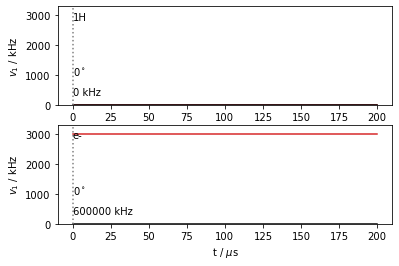

In [51]:
seq.plot()

In [52]:
U=seq.U()

In [53]:
rho=sl.Rho(rho0='ez',detect=['ez','1Hz'])

In [58]:
rho.clear()
rho()
for _ in range(20):
    (U*rho)()
    

In [48]:
rho.DetProp(U,n=2000)

Density Matrix/Detection Operator
rho0: ez
detect[0]: ez
detect[1]: 1Hz
Current time is 40400000.000 microseconds
2021 time points have been recorded


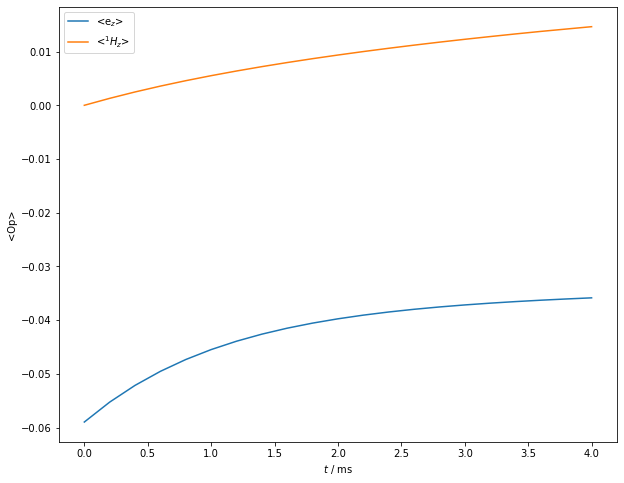

In [59]:
ax=rho.plot()
ax.figure.set_size_inches([10,8])

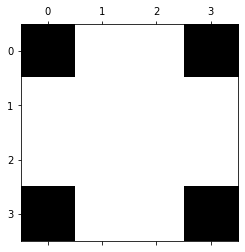

In [103]:
plt.spy(L.recovery)

In [104]:
L.recovery.sum(0)

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [110]:
L[0].L(0)@L.rho_eq()

array([ 2.84217094e-14    +0.j        ,  0.00000000e+00-37041.96066944j,
        0.00000000e+00+37041.96066944j, -2.84217094e-14    +0.j        ])

In [111]:
from scipy.linalg import expm

In [124]:
expm(L[0].L(0))

array([[ 4.99880394e-01+0.00000000e+00j,  0.00000000e+00+1.85133031e-17j,
         0.00000000e+00-1.85133031e-17j,  4.99880394e-01+0.00000000e+00j],
       [ 0.00000000e+00-6.68843022e-05j,  2.47709127e-21+0.00000000e+00j,
        -2.47709127e-21+0.00000000e+00j,  0.00000000e+00-6.68843022e-05j],
       [ 0.00000000e+00+6.68843022e-05j, -2.47709127e-21+0.00000000e+00j,
         2.47709127e-21+0.00000000e+00j,  0.00000000e+00+6.68843022e-05j],
       [ 5.00119606e-01+0.00000000e+00j,  0.00000000e+00+1.85221625e-17j,
         0.00000000e+00-1.85221625e-17j,  5.00119606e-01+0.00000000e+00j]])

In [123]:
L[0].L(0)-L.Lrf

array([[-3.99252937e+02+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         3.15032778e+02+0.j],
       [ 0.00000000e+00+0.j, -1.12359551e+06+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j, -1.12359551e+06+0.j,
         0.00000000e+00+0.j],
       [ 3.99252937e+02+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        -3.15032778e+02+0.j]])

In [50]:
L[0].L(0)

array([[-3.99252937e+02+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         3.15032778e+02+0.j],
       [ 0.00000000e+00+0.j, -1.12359551e+06+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j, -1.12359551e+06+0.j,
         0.00000000e+00+0.j],
       [ 3.99252937e+02+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        -3.15032778e+02+0.j]])

In [108]:
L.rf.add_field(0,100000)

In [128]:
U=L.U(Dt=1/50)

In [129]:
U[0]

array([[ 4.99880394e-01-2.95119621e-13j,  1.26959853e-16-1.02423447e-16j,
         1.26092792e-16+1.19137137e-17j,  4.99880394e-01-2.95060756e-13j],
       [ 5.84247973e-17-6.68843022e-05j, -1.37043198e-20-1.69873060e-20j,
         1.59406218e-21-1.68712926e-20j,  5.84326734e-17-6.68843022e-05j],
       [ 1.21289177e-16+6.68843022e-05j,  1.37043198e-20+1.69873060e-20j,
        -1.59406218e-21+1.68712926e-20j,  1.21281301e-16+6.68843022e-05j],
       [ 5.00119606e-01-2.95123398e-13j,  1.27020609e-16-1.02472461e-16j,
         1.26153132e-16+1.19194149e-17j,  5.00119606e-01-2.95064506e-13j]])

In [130]:
U1=seq.U()